# Comparative analysis of ensemble simulations (small populations)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [2]:
neutral = pd.read_csv('./Analysis-Data/Small-neutral-1000_sim-Analyzed_data.csv', index_col=0)
selection_0p004 = pd.read_csv('./Analysis-Data/Small-selection_0p004-1000_sim-Analyzed_data.csv', index_col=0)
selection_0p01 = pd.read_csv('./Analysis-Data/Small-selection_0p01-1000_sim-Analyzed_data.csv', index_col=0)
selection_0p05 = pd.read_csv('./Analysis-Data/Small-selection_0p05-1000_sim-Analyzed_data.csv', index_col=0)
selection_0p1 = pd.read_csv('./Analysis-Data/Small-selection_0p1-1000_sim-Analyzed_data.csv', index_col=0)
selection_0p15 = pd.read_csv('./Analysis-Data/Small-selection_0p15-1000_sim-Analyzed_data.csv', index_col=0)
selection_0p2 = pd.read_csv('./Analysis-Data/Small-selection_0p2-1000_sim-Analyzed_data.csv', index_col=0)
selection_0p3 = pd.read_csv('./Analysis-Data/Small-selection_0p3-1000_sim-Analyzed_data.csv', index_col=0)
selection_1p5 = pd.read_csv('./Analysis-Data/Small-selection_1p5-1000_sim-Analyzed_data.csv', index_col=0)
selection_3 = pd.read_csv('./Analysis-Data/Small-selection_3-1000_sim-Analyzed_data.csv', index_col=0)

In [3]:
# different selection factors that were used for populations in order
selection_values = [0, 0.004, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 1.5, 3]

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Maximum allele frequencies

In [5]:
neutral_MaxAFs = neutral["MaxAFs"].values
selection_0p004_MaxAFs = selection_0p004["MaxAFs"].values
selection_0p01_MaxAFs = selection_0p01["MaxAFs"].values
selection_0p05_MaxAFs = selection_0p05["MaxAFs"].values
selection_0p1_MaxAFs = selection_0p1["MaxAFs"].values
selection_0p15_MaxAFs = selection_0p15["MaxAFs"].values
selection_0p2_MaxAFs = selection_0p2["MaxAFs"].values
selection_0p3_MaxAFs = selection_0p3["MaxAFs"].values
selection_1p5_MaxAFs = selection_1p5["MaxAFs"].values
selection_3_MaxAFs = selection_3["MaxAFs"].values

pop_MaxAFs = [neutral_MaxAFs, selection_0p004_MaxAFs, selection_0p01_MaxAFs, 
              selection_0p05_MaxAFs, selection_0p1_MaxAFs, selection_0p15_MaxAFs,
              selection_0p2_MaxAFs, selection_0p3_MaxAFs, selection_1p5_MaxAFs, selection_3_MaxAFs]

In [6]:
total_maxAFs = pd.DataFrame({'sel_factor': 0, 'max_AF': neutral_MaxAFs})

for sel, maxAFs in zip(selection_values[1:], pop_MaxAFs[1:]):
    df = pd.DataFrame({'sel_factor': sel, 'max_AF': maxAFs})
    total_maxAFs = pd.concat([total_maxAFs, df])

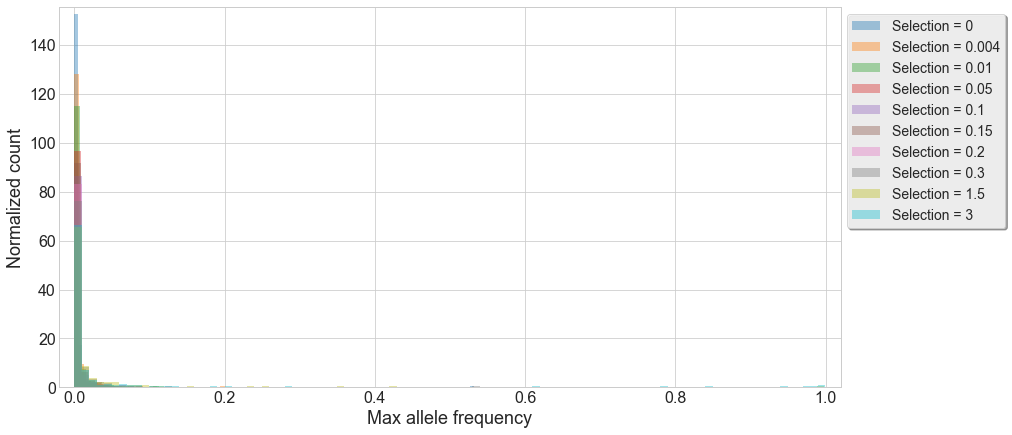

In [7]:
plt.figure();
for sel, maxAF in zip(selection_values, pop_MaxAFs):
    sns.distplot(maxAF, bins=100, kde=False, norm_hist=True, label="Selection = %s" %(sel));

plt.xlabel('Max allele frequency');
plt.ylabel('Normalized count');
plt.legend(frameon=True, fancybox=True, shadow=True);
plt.legend(loc='upper right', bbox_to_anchor=(1.22,1), frameon=True, fancybox=True, shadow=True);
plt.margins(0.02);
plt.show()

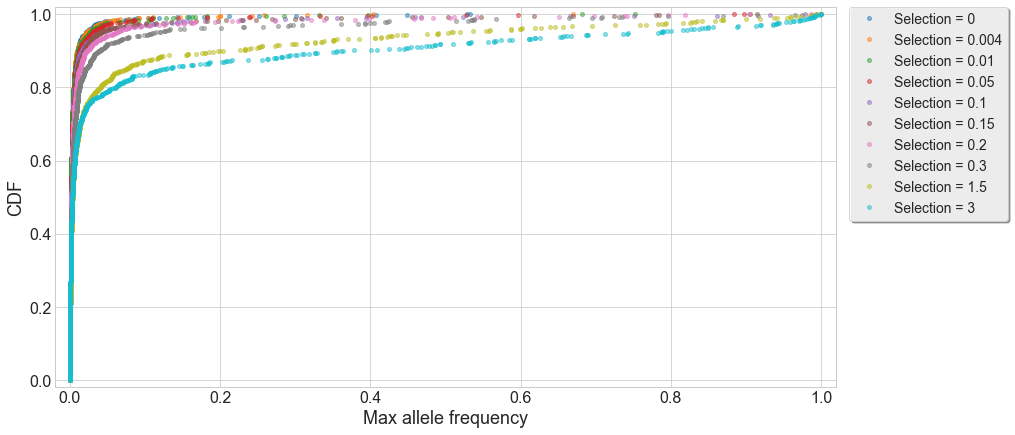

In [8]:
plt.figure();
for sel, maxAF in zip(selection_values, pop_MaxAFs):
    x, y = ecdf(maxAF)
    plt.plot(x, y, marker='.', linestyle='none', alpha=0.5, label='Selection = %s' %sel);

plt.xlabel('Max allele frequency');
plt.ylabel('CDF');
plt.legend(loc='upper right', bbox_to_anchor=(1.22,1), frameon=True, fancybox=True, shadow=True, borderaxespad=0.);
plt.margins(0.02);
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Max_AFs-CDF.png', bbox_inches='tight')
plt.show()

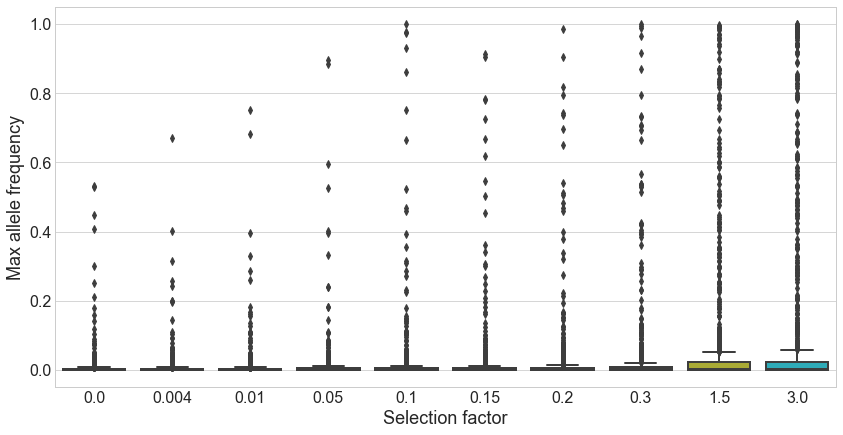

In [9]:
sns.boxplot(x='sel_factor', y='max_AF', data=total_maxAFs);
plt.xlabel('Selection factor');
plt.ylabel('Max allele frequency');
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Max_AFs-Boxplot.png', bbox_inches='tight')
plt.show()

In [10]:
med_max_afs = []
for max_af in pop_MaxAFs:
    med_max_afs.append(np.median(max_af))

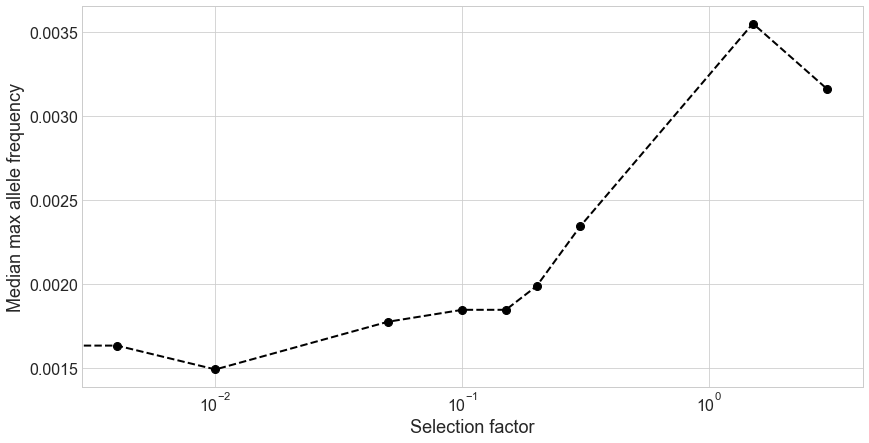

In [11]:
plt.plot(selection_values, med_max_afs, marker='o', linestyle='--', color='k');
plt.xlabel("Selection factor");
plt.ylabel("Median max allele frequency");
plt.xscale('log');
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Max_AFs-Median_scaled.png', bbox_inches='tight')
plt.show()

## Heterogeneity

In [12]:
neutral_H = neutral["H"].values
selection_0p004_H = selection_0p004["H"].values
selection_0p01_H = selection_0p01["H"].values
selection_0p05_H = selection_0p05["H"].values
selection_0p1_H = selection_0p1["H"].values
selection_0p15_H = selection_0p15["H"].values
selection_0p2_H = selection_0p2["H"].values
selection_0p3_H = selection_0p3["H"].values
selection_1p5_H = selection_1p5["H"].values
selection_3_H = selection_3["H"].values

pop_H = [neutral_H, selection_0p004_H, selection_0p01_H, selection_0p05_H, selection_0p1_H,
         selection_0p15_H, selection_0p2_H, selection_0p3_H, selection_1p5_H, selection_3_H]

In [13]:
total_H = pd.DataFrame({'sel_factor': 0, 'heterogeneity': neutral_H})

for sel, H in zip(selection_values[1:], pop_H[1:]):
    df = pd.DataFrame({'sel_factor': sel, 'heterogeneity': H})
    total_H = pd.concat([total_H, df])

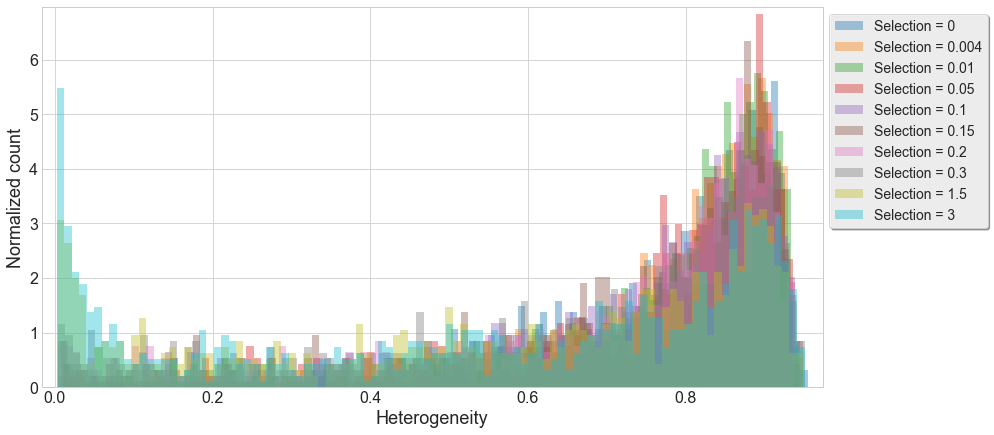

In [14]:
plt.figure()
for sel, H in zip(selection_values, pop_H):
    sns.distplot(H, bins=100, kde=False, norm_hist=True, label="Selection = %s" %(sel));

plt.xlabel('Heterogeneity');
plt.ylabel('Normalized count');
plt.margins(0.02);
plt.legend(frameon=True, fancybox=True, shadow=True);
plt.legend(loc='upper right', bbox_to_anchor=(1.22,1), frameon=True, fancybox=True, shadow=True);
plt.show()

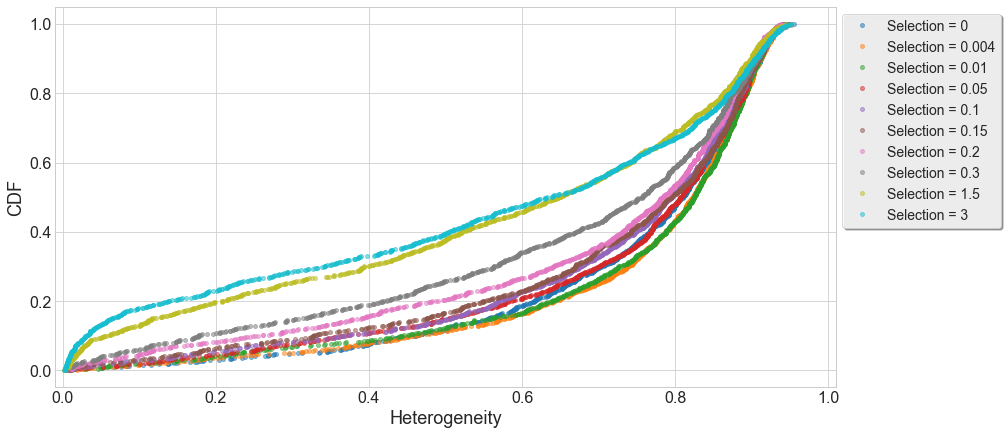

In [15]:
plt.figure()
for sel, H in zip(selection_values, pop_H):
    x, y = ecdf(H)
    plt.plot(x, y, marker='.', linestyle='none', alpha=0.5, label='Selection = %s' %sel);

plt.xlabel('Heterogeneity');
plt.ylabel('CDF');
plt.legend(loc='upper right', bbox_to_anchor=(1.22,1), frameon=True, fancybox=True, shadow=True);
plt.xlim(-0.01, 1.01);
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Heterogeneity-CDF.png', bbox_inches='tight')
plt.show()

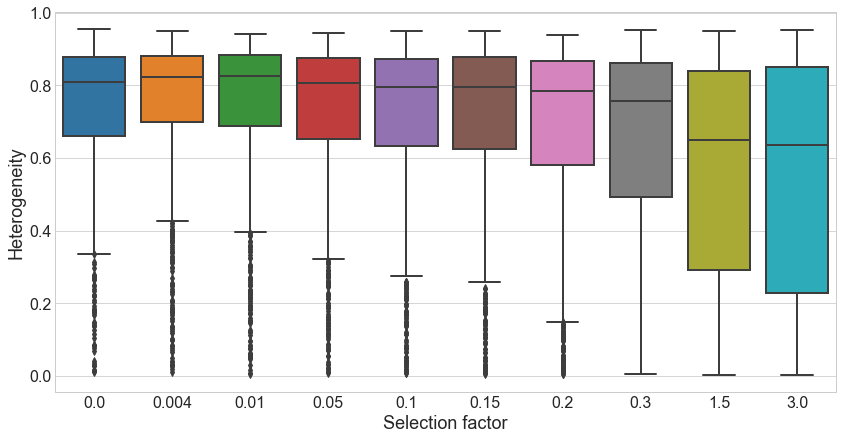

In [16]:
sns.boxplot(x='sel_factor', y='heterogeneity', data=total_H);
plt.xlabel('Selection factor');
plt.ylabel('Heterogeneity');
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Heterogeneity-Boxplot.png', bbox_inches='tight')
plt.show()

In [17]:
med_H = []
for H in pop_H:
    med_H.append(np.median(H))

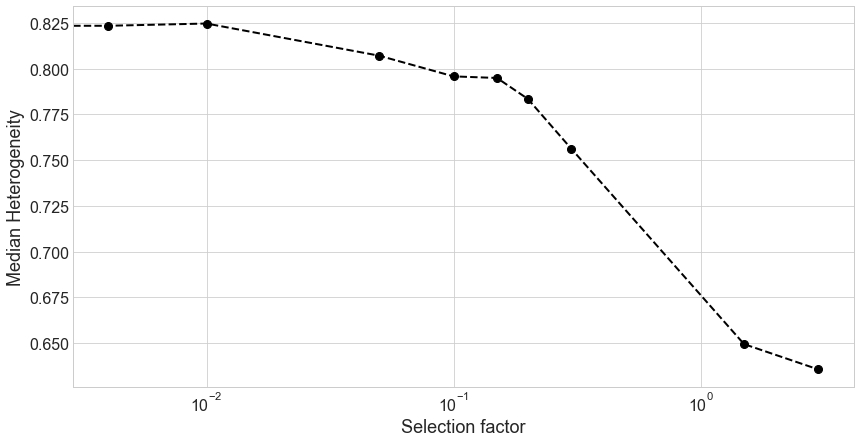

In [18]:
plt.plot(selection_values, med_H, marker='o', linestyle='--', color='k');
plt.xlabel("Selection factor");
plt.ylabel("Median Heterogeneity");
plt.xscale('log');
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Heterogeneity-Median_scaled.png', bbox_inches='tight')
plt.show()

## Mutational burden (number of mutations distribution)

In [19]:
neutral_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-neutral_mut_distr.csv', index_col=0)
neutral_mut_distr.columns = neutral_mut_distr.columns.astype(int)

selection_0p004_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-selection_0p004_mut_distr.csv', index_col=0)
selection_0p004_mut_distr.columns = selection_0p004_mut_distr.columns.astype(int)

selection_0p01_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-selection_0p01_mut_distr.csv', index_col=0)
selection_0p01_mut_distr.columns = selection_0p01_mut_distr.columns.astype(int)

selection_0p05_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-selection_0p05_mut_distr.csv', index_col=0)
selection_0p05_mut_distr.columns = selection_0p05_mut_distr.columns.astype(int)

selection_0p1_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-selection_0p1_mut_distr.csv', index_col=0)
selection_0p1_mut_distr.columns = selection_0p1_mut_distr.columns.astype(int)

selection_0p15_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-selection_0p15_mut_distr.csv', index_col=0)
selection_0p15_mut_distr.columns = selection_0p15_mut_distr.columns.astype(int)

selection_0p2_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-selection_0p2_mut_distr.csv', index_col=0)
selection_0p2_mut_distr.columns = selection_0p2_mut_distr.columns.astype(int)

selection_0p3_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-selection_0p3_mut_distr.csv', index_col=0)
selection_0p3_mut_distr.columns = selection_0p3_mut_distr.columns.astype(int)

selection_1p5_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-selection_1p5_mut_distr.csv', index_col=0)
selection_1p5_mut_distr.columns = selection_1p5_mut_distr.columns.astype(int)

selection_3_mut_distr = pd.read_csv('./Analysis-Data/Small-1000_sim-selection_3_mut_distr.csv', index_col=0)
selection_3_mut_distr.columns = selection_3_mut_distr.columns.astype(int)

nmd_list = [neutral_mut_distr, selection_0p004_mut_distr, selection_0p01_mut_distr, selection_0p05_mut_distr,
            selection_0p1_mut_distr, selection_0p15_mut_distr, selection_0p2_mut_distr, selection_0p3_mut_distr, 
            selection_1p5_mut_distr, selection_3_mut_distr]

In [20]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ThesisScripts.Analyses import avg_num_mutations

In [21]:
avg_NMDs = []
std_NMDs = []

for nmd in nmd_list:
    avg_nmd = nmd.mean()
    std_nmd = nmd.std()
    avg_NMDs.append(avg_nmd)
    std_NMDs.append(std_nmd)

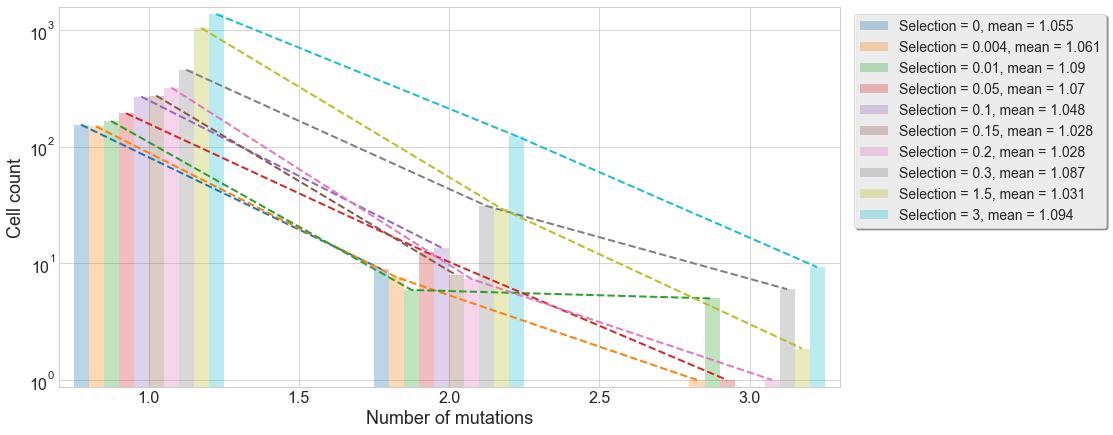

In [22]:
plt.figure();
offset = -0.225
for sel, avg_nmd in zip(selection_values, avg_NMDs):
    avg_num_mut = avg_num_mutations(avg_nmd)
    
    plt.plot(avg_nmd.index+offset, avg_nmd.values, linestyle='--', alpha=1);
    plt.bar(left=avg_nmd.index+offset, height=avg_nmd.values, width=0.05, alpha=0.3, 
           label="Selection = %s, mean = %s" %(sel, round(avg_num_mut, 3)));
    offset += 0.05
    
plt.xlabel("Number of mutations");
plt.ylabel("Cell count");
plt.yscale('log');
#plt.xticks();
plt.margins(0.02);
plt.legend(loc='upper right', bbox_to_anchor=(1.35,1), frameon=True, fancybox=True, shadow=True);
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Num_mut.png', bbox_inches='tight')
plt.show()

## Total number of mutations

In [23]:
neutral_total_m = neutral["total_m"].values
selection_0p004_total_m = selection_0p004["total_m"].values
selection_0p01_total_m = selection_0p01["total_m"].values
selection_0p05_total_m = selection_0p05["total_m"].values
selection_0p1_total_m = selection_0p1["total_m"].values
selection_0p15_total_m = selection_0p15["total_m"].values
selection_0p2_total_m = selection_0p2["total_m"].values
selection_0p3_total_m = selection_0p3["total_m"].values
selection_1p5_total_m = selection_1p5["total_m"].values
selection_3_total_m = selection_3["total_m"].values

total_Ms = [neutral_total_m, selection_0p004_total_m, selection_0p01_total_m, selection_0p05_total_m,
            selection_0p1_total_m, selection_0p15_total_m, selection_0p2_total_m, selection_0p3_total_m, 
            selection_1p5_total_m, selection_3_total_m]

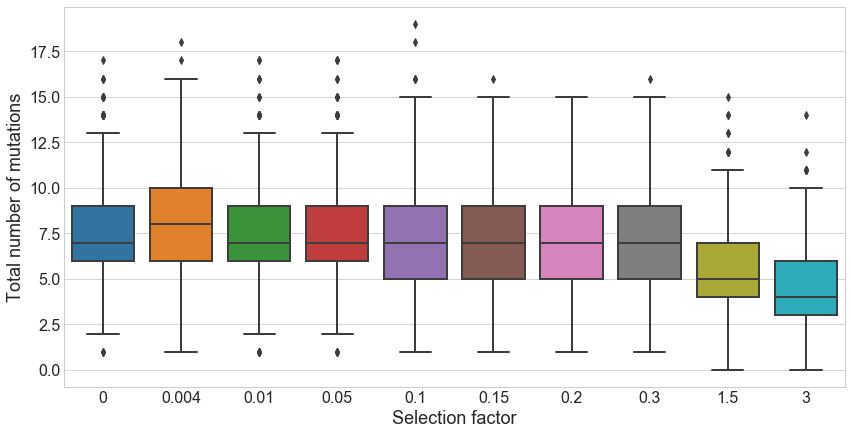

In [24]:
sns.boxplot(data=total_Ms);
plt.ylabel("Total number of mutations");
plt.xlabel("Selection factor");
plt.xticks(range(len(total_Ms)), selection_values);
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Total_M-Boxplot.png', bbox_inches='tight')
plt.show()

In [25]:
med_M = []
for M in total_Ms:
    med_M.append(np.median(M))

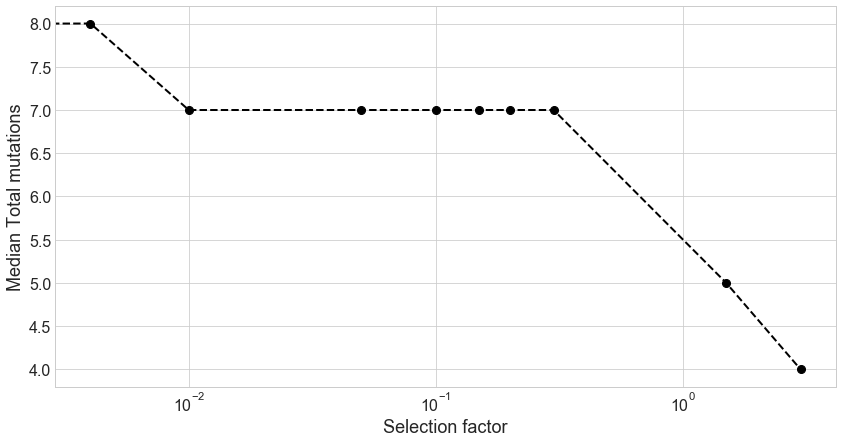

In [26]:
plt.plot(selection_values, med_M, marker='o', linestyle='--', color='k');
plt.xlabel("Selection factor");
plt.ylabel("Median Total mutations");
plt.xscale('log');
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Total_M-Median_scaled.png', bbox_inches='tight')
plt.show()

## Errors in reconstruction of mutational timeline

In [27]:
neutral_rec_errors = neutral["rec_errors"].values
selection_0p004_rec_errors = selection_0p004["rec_errors"].values
selection_0p01_rec_errors = selection_0p01["rec_errors"].values
selection_0p05_rec_errors = selection_0p05["rec_errors"].values
selection_0p1_rec_errors = selection_0p1["rec_errors"].values
selection_0p15_rec_errors = selection_0p15["rec_errors"].values
selection_0p2_rec_errors = selection_0p2["rec_errors"].values
selection_0p3_rec_errors = selection_0p3["rec_errors"].values
selection_1p5_rec_errors = selection_1p5["rec_errors"].values
selection_3_rec_errors = selection_3["rec_errors"].values

total_rec_errors = [neutral_rec_errors, selection_0p004_rec_errors, selection_0p01_rec_errors, 
            selection_0p05_rec_errors, selection_0p1_rec_errors, selection_0p15_rec_errors,
            selection_0p2_rec_errors, selection_0p3_rec_errors, selection_1p5_rec_errors, 
            selection_3_rec_errors]

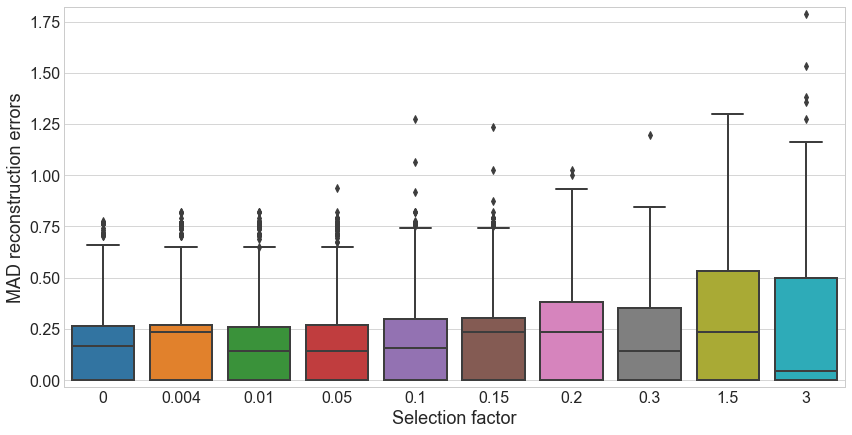

In [28]:
sns.boxplot(data=total_rec_errors);
plt.ylabel("MAD reconstruction errors");
plt.xticks(range(len(total_rec_errors)), selection_values);
plt.xlabel("Selection factor");
plt.margins(0.02);
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Rec_errors-Boxplot.png', bbox_inches='tight')
plt.show()

In [29]:
med_rec_errors = []
for rec_errors in total_rec_errors:
    med_rec_errors.append(np.median(rec_errors))

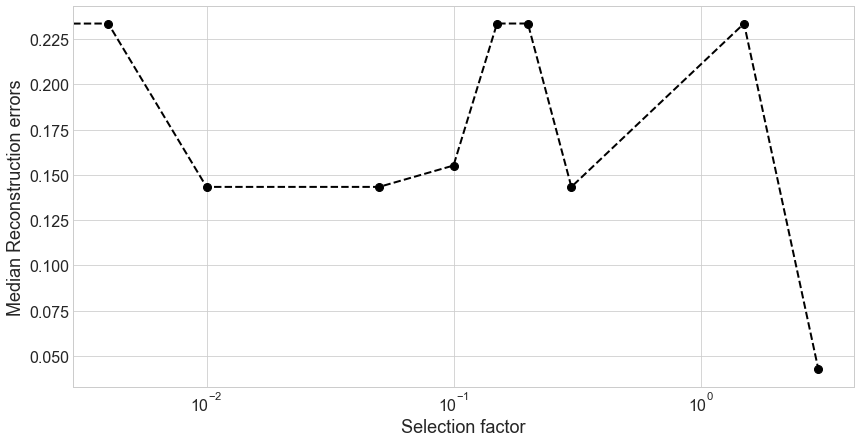

In [30]:
plt.plot(selection_values, med_rec_errors, marker='o', linestyle='--', color='k');
plt.xlabel("Selection factor");
plt.ylabel("Median Reconstruction errors");
plt.xscale('log');
plt.savefig('./Figures/Comparative_analysis-Small-Figures/COMBO-small-Rec_errors-Median_scaled.png', bbox_inches='tight')
plt.show()